In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import multiprocessing
from multiprocessing import Pool

csv_file = 'D:/HUMOB/sapporo_Cchallengedata.csv'
df = pd.read_csv(csv_file)

In [3]:
print(df.head(50))  # 顯示前5行

    uid  d   t   x    y
0     0  5  15  28  157
1     0  5  16  28  158
2     0  5  17  28  157
3     0  5  18  29  158
4     0  5  19  27  157
5     0  5  20  25  155
6     0  5  21  26  153
7     0  5  22  24  156
8     0  5  23  25  154
9     0  5  24  26  155
10    0  5  25  27  156
11    0  5  26  28  157
12    0  5  29  29  158
13    0  5  30  28  157
14    0  5  31  29  158
15    0  5  32  28  157
16    0  5  33  29  158
17    0  5  35  28  158
18    0  5  36  29  157
19    0  5  37  29  157
20    0  5  38  28  157
21    0  5  39  29  158
22    0  6   0  28  158
23    0  6   1  28  157
24    0  6   2  28  157
25    0  6   8  29  158
26    0  6  12  28  157
27    0  6  15  29  158
28    0  6  16  27  157
29    0  6  29  28  158
30    0  6  30  28  157
31    0  6  32  29  158
32    0  6  33  28  157
33    0  6  34  28  157
34    0  6  35  28  157
35    0  6  38  28  158
36    0  6  39  28  157
37    0  6  42  29  157
38    0  7   1  28  157
39    0  7   2  28  157
40    0  7   5  

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

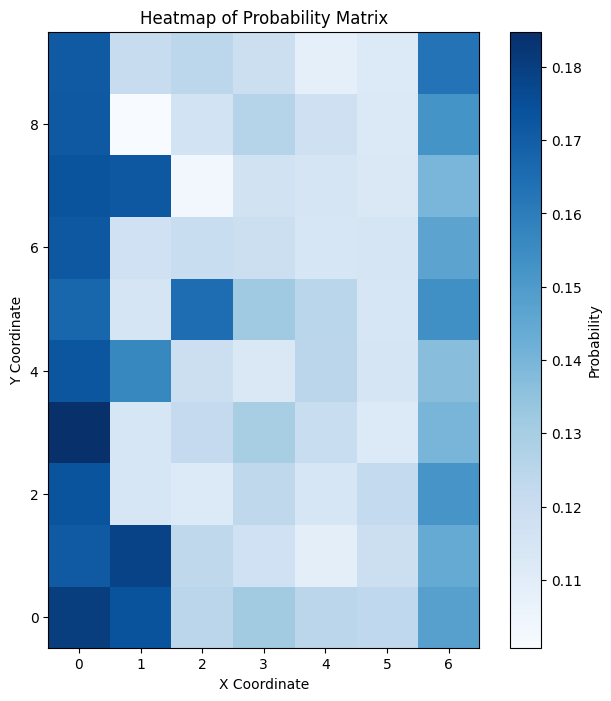

In [5]:
def plot_heatmap(matrix):
    # 確保矩陣大小為201x201
    # if matrix.shape != (201, 201):
    #     raise ValueError("矩陣大小必須為201x201")
    
    # 設定顏色映射範圍
    vmin = np.min(matrix)
    vmax = np.max(matrix)
    
    # 繪製熱度圖
    plt.figure(figsize=(8, 8))
    plt.imshow(matrix, cmap='Blues', interpolation='nearest', origin='lower', vmin=vmin, vmax=vmax)
    
    # 添加顏色條
    plt.colorbar(label='Probability')
    
    # 設置標題和標籤
    plt.title('Heatmap of Probability Matrix')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    
    # 顯示圖形
    plt.show()

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def calculate_probability_matrix(df, uid, d=None):
    df_uid = df[df['uid'] == uid]

    if d is not None:
        df_uid = df_uid[df_uid['d'] == d]

    grid_size = 201
    probability_matrix = np.zeros((grid_size, grid_size))

    for _, row in df_uid.iterrows():
        x, y = int(row['x']), int(row['y'])
        probability_matrix[x, y] += 1

    total_count = len(df_uid)
    if total_count > 0:
        probability_matrix /= total_count

    return probability_matrix


def get_arr(uid):
    print(uid)
    mask = calculate_probability_matrix(df, uid)
    # mask = (mask-np.average(mask)) / mask.std()
    # mask = sigmoid(mask)

    def get_d(d):
        matrix = calculate_probability_matrix(df, uid, d)
        return ((matrix-mask)**2).sum()

    return [get_d(d) for d in range(70)]

# if __name__ == "__main__":
#     with Pool(multiprocessing.cpu_count()) as pool:
#         r = np.array(pool.map(get_arr, range(3)))
#     r:np.ndarray = np.average(r, axis=0)
#     r = r.reshape((r.size//7, 7))

#     plot_heatmap(r)

if __name__ == "__main__":
    
    r = np.array(list(map(get_arr, range(500))))
    r:np.ndarray = np.average(r, axis=0)
    r = r.reshape((r.size//7, 7))

    plot_heatmap(r)